In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.math import sin, cos, tanh   #수학에 관련된 모듈
from tensorflow.linalg import diag, svd, matrix_transpose  #선형대수에 관련된 모듈

# 3.1 기본 연산 해보기

In [5]:
#텐서의 차원과 기본 연산

a = tf.constant(2)
print(tf.rank(a))

b = tf.constant([1,2])
print(tf.rank(b))

c = tf.constant([[1,2],[3,4]])
print(tf.rank(c))

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [7]:
# 즉시 실행 모드를 통한 연산

a = tf.constant(3)
b = tf.constant(2)

#텐서형태로 출력
print(tf.add(a,b))
print(tf.subtract(a,b))

#넘파이 배열 형태로 출력 <- numpy() 사용
print(tf.multiply(a,b).numpy())
print(tf.divide(a,b).numpy())


tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
6
1.5


In [13]:
# 텐서 -> 넘파이, 넘파이 -> 텐서

c = tf.add(a,b).numpy()
c_square = np.square(c, dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_square)  #텐서로 변환

print('numpy array : %0.1f, applying square with numpy : %0.1f , convert_to_tensor : %0.1f' % (c, c_square, c_tensor))

numpy array : 5.0, applying square with numpy : 25.0 , convert_to_tensor : 25.0


In [19]:
# @tf.function : 빠른 연산 가능

def square_pos(x):
    if x > 0:
        x = x*x
    else:
        x = x* -1
    return x
square_pos


<function __main__.square_pos(x)>

In [20]:
@tf.function

def square_pos2(x):
    if x>0:
        x=x*x
    else:
        x=x*-1
    return x
square_pos2

# 3.2 신경망

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD    #SGD : 확률적 경사 하강법
from tensorflow.keras.losses import mse
from tensorflow.keras.optimizers import RMSprop

In [36]:
# or 게이트

tf.random.set_seed(777)

x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[1]])

model = Sequential()

model.add(Dense(1, input_shape=(2,), activation='linear'))

model.compile(optimizer = SGD(),
             loss = mse,
             metrics = ['acc'])

model.fit(x,y,epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 0s/step - loss: 1.4290 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 0s/step - loss: 1.3602 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 0.9005 -

1/1 [==============================] - 0s 5ms/step - loss: 0.1270 - acc: 0.7500
Epoch 175/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1264 - acc: 0.7500
Epoch 176/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1258 - acc: 0.7500
Epoch 177/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1253 - acc: 0.7500
Epoch 178/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1247 - acc: 0.7500
Epoch 179/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1242 - acc: 0.7500
Epoch 180/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1236 - acc: 0.7500
Epoch 181/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1231 - acc: 0.7500
Epoch 182/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1225 - acc: 0.7500
Epoch 183/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1220 - acc: 0.7500
Epoch 184/500
1/1 [==============================] - 0s 0s/step - loss: 0.

1/1 [==============================] - 0s 4ms/step - loss: 0.0770 - acc: 1.0000
Epoch 346/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0768 - acc: 1.0000
Epoch 347/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0767 - acc: 1.0000
Epoch 348/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0766 - acc: 1.0000
Epoch 349/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0765 - acc: 1.0000
Epoch 350/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0764 - acc: 1.0000
Epoch 351/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - acc: 1.0000
Epoch 352/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0761 - acc: 1.0000
Epoch 353/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0760 - acc: 1.0000
Epoch 354/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0759 - acc: 1.0000
Epoch 355/500
1/1 [==============================] - 0s 3ms/step - loss: 0

In [34]:
x.shape

(4, 2)

In [37]:
model.get_weights()

[array([[0.49431452],
        [0.37552658]], dtype=float32), array([0.3271933], dtype=float32)]

In [38]:
# and 게이트

x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[0],[0],[1]])

model = Sequential()

model.add(Dense(1, input_shape=(2,), activation='linear'))

model.compile(optimizer = SGD(),
             loss = mse,
             metrics = ['acc'])

model.fit(x,y,epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 0s/step - loss: 0.2004 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 997us/step - loss: 0.1989 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1973 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1958 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1943 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1929 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1914 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1900 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1887 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 0.1873 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 999us/step - loss: 0.1

1/1 [==============================] - 0s 3ms/step - loss: 0.0912 - acc: 1.0000
Epoch 175/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0909 - acc: 1.0000
Epoch 176/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0907 - acc: 1.0000
Epoch 177/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0904 - acc: 1.0000
Epoch 178/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0902 - acc: 1.0000
Epoch 179/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0900 - acc: 1.0000
Epoch 180/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0897 - acc: 1.0000
Epoch 181/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0895 - acc: 1.0000
Epoch 182/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0893 - acc: 1.0000
Epoch 183/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0890 - acc: 1.0000
Epoch 184/500
1/1 [==============================] - 0s 3ms/step - loss: 0

Epoch 347/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0694 - acc: 1.0000
Epoch 348/500
1/1 [==============================] - 0s 0s/step - loss: 0.0693 - acc: 1.0000
Epoch 349/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0693 - acc: 1.0000
Epoch 350/500
1/1 [==============================] - 0s 0s/step - loss: 0.0692 - acc: 1.0000
Epoch 351/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0692 - acc: 1.0000
Epoch 352/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0691 - acc: 1.0000
Epoch 353/500
1/1 [==============================] - 0s 0s/step - loss: 0.0691 - acc: 1.0000
Epoch 354/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0690 - acc: 1.0000
Epoch 355/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0690 - acc: 1.0000
Epoch 356/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0689 - acc: 1.0000
Epoch 357/500
1/1 [==============================] - 0s 2ms/ste

1/1 [==============================] - 0s 4ms/step - loss: 0.0660 - acc: 1.0000
Epoch 435/500
1/1 [==============================] - 0s 1000us/step - loss: 0.0660 - acc: 1.0000
Epoch 436/500
1/1 [==============================] - 0s 996us/step - loss: 0.0659 - acc: 1.0000
Epoch 437/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0659 - acc: 1.0000
Epoch 438/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0659 - acc: 1.0000
Epoch 439/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0659 - acc: 1.0000
Epoch 440/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0658 - acc: 1.0000
Epoch 441/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0658 - acc: 1.0000
Epoch 442/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0658 - acc: 1.0000
Epoch 443/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0658 - acc: 1.0000
Epoch 444/500
1/1 [==============================] - 0s 6ms/step - lo

In [39]:
model.get_weights()

[array([[0.41167912],
        [0.48379776]], dtype=float32), array([-0.18801045], dtype=float32)]

In [8]:
# NAND 게이트

x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[1],[1],[1],[0]])

model = Sequential()

model.add(Dense(1, input_shape=(2,), activation='linear'))

model.compile(optimizer = SGD(),
             loss = mse,
             metrics = ['acc'])

model.fit(x,y,epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 0s/step - loss: 0.8985 - acc: 0.2500
Epoch 2/500
1/1 [==============================] - 0s 0s/step - loss: 0.8895 - acc: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.8807 - acc: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8722 - acc: 0.2500
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8639 - acc: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 998us/step - loss: 0.8557 - acc: 0.2500
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8477 - acc: 0.2500
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8400 - acc: 0.2500
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.8324 - acc: 0.2500
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8249 - acc: 0.2500
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8176 

1/1 [==============================] - 0s 5ms/step - loss: 0.2784 - acc: 0.5000
Epoch 175/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2768 - acc: 0.5000
Epoch 176/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2753 - acc: 0.5000
Epoch 177/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2738 - acc: 0.5000
Epoch 178/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2722 - acc: 0.5000
Epoch 179/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2707 - acc: 0.5000
Epoch 180/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2692 - acc: 0.5000
Epoch 181/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2677 - acc: 0.5000
Epoch 182/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2663 - acc: 0.5000
Epoch 183/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2648 - acc: 0.5000
Epoch 184/500
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 3ms/step - loss: 0.1268 - acc: 0.7500
Epoch 347/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1264 - acc: 0.7500
Epoch 348/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1259 - acc: 0.7500
Epoch 349/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1255 - acc: 0.7500
Epoch 350/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1251 - acc: 0.7500
Epoch 351/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1246 - acc: 0.7500
Epoch 352/500
1/1 [==============================] - 0s 0s/step - loss: 0.1242 - acc: 0.7500
Epoch 353/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1238 - acc: 0.7500
Epoch 354/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1234 - acc: 0.7500
Epoch 355/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1230 - acc: 0.7500
Epoch 356/500
1/1 [==============================] - 0s 4ms/step - loss: 0.

In [41]:
model.get_weights()

[array([[-0.23936202],
        [-0.36854893]], dtype=float32), array([1.0174638], dtype=float32)]

In [3]:
# 벡터의 내적

x = tf.random.uniform((10,5))
w = tf.random.uniform((5,3))
d = tf.matmul(x,w)

print(f"x와 w의 벡터 내적의 결과 크기:{d.shape}")

x와 w의 벡터 내적의 결과 크기:(10, 3)


In [10]:
# XOR게이터 구현해보기 + 다층 퍼셉트론

tf.random.set_seed(777)

data = np.array([[0,0],[1,0],[0,1],[1,1]])
label = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(32, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = RMSprop(),
             loss = mse,
             metrics = ['acc'])

model.fit(data, label, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2621 - acc: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2603 - acc: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2589 - acc: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 998us/step - loss: 0.2578 - acc: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2568 - acc: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2558 - acc: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2550 - acc: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2541 - acc: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2533 - acc: 0.2500
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 0.252

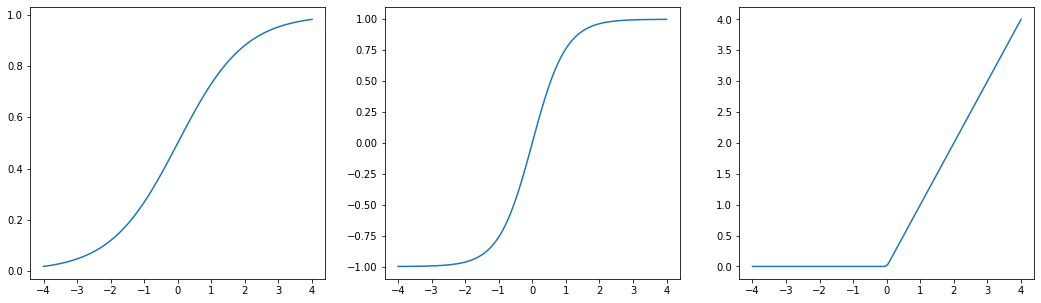

In [19]:
# 활성화 함수
import matplotlib.pyplot as plt
import math

# 1. 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 2. 하이퍼볼릭 탄젠트 함수
def tanh(x):
    return list(map(lambda x : math.tanh(x),x))

# 3. relu함수
def relu(x):
    result = []
    for ele in x:
        if(ele <= 0):
            result.append(0)
        else:
            result.append(ele)
    return result

x = np.linspace(-4,4,100)
sig = sigmoid(x)
tanh = tanh(x)
relu = relu(x)

#plt.plot(x, sig)

f, ax = plt.subplots(1,3, figsize=(18,5))
ax[0].plot(x, sig)
ax[1].plot(x, tanh)
ax[2].plot(x, relu)

plt.show()

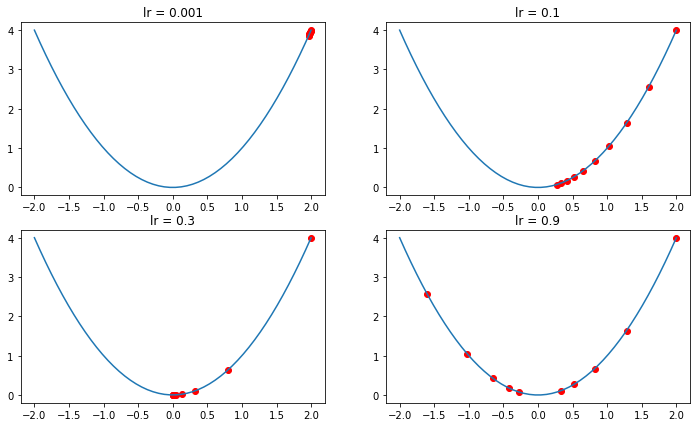

In [12]:
# 경사하강법 실험해보기

lr_list = [0.001, 0.1, 0.3, 0.9]

def get_derivative(lr):
    
    w_old = 2                      #weight_old
    derivative = [w_old]
    
    y = [w_old ** 2]               #손실함수 y=x^26tgv 
    
    for i in range(1,10):
        dev_value = w_old * 2
        
        w_new = w_old - lr*dev_value    #가중치 업데이트
        w_old = w_new
        
        derivative.append(w_old)
        y.append(w_old ** 2)
        
    return derivative, y

x = np.linspace(-2, 2, 50)
x_square = [i ** 2 for i in x]

fig = plt.figure(figsize = (12,7))

for i, lr in enumerate(lr_list):
    derivative, y = get_derivative(lr)
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(derivative, y, color = 'red')
    ax.plot(x, x_square)
    ax.title.set_text('lr = ' + str(lr))
    
plt.show()
    

# 실습해봅시다!

In [48]:
#1. 단층 퍼셉트론으로 xor게이트를 적은 횟수의 에폭으로 학습시켜보고 evaluate(), predict() 통해 결과 출력 

x = np.array([[0,0], [1,0], [0,1], [1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation = 'linear'))

model.compile(optimizer = SGD(),
             loss = mse,
             metrics = ['acc'])

hist = model.fit(x,y, epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 1ms/step - loss: 1.3226 - acc: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 0s/step - loss: 1.2613 - acc: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 2ms/step - loss: 1.2037 - acc: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 1000us/step - loss: 1.1497 - acc: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 3ms/step - loss: 1.0991 - acc: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 3ms/step - loss: 1.0515 - acc: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 3ms/step - loss: 1.0069 - acc: 0.5000
Epoch 8/30
1/1 [==============================] - 0s 2ms/step - loss: 0.9650 - acc: 0.5000
Epoch 9/30
1/1 [==============================] - 0s 2ms/step - loss: 0.9257 - acc: 0.5000
Epoch 10/30
1/1 [==============================] - 0s 998us/step - loss: 0.8888 - acc: 0.5000
Epoch 11/30
1/1 [==============================] - 0s 7ms/step - loss: 0.8541 - acc: 

In [49]:
test_loss, test_acc = model.evaluate(x, y)
print("\n테스트 정확도:", test_acc)

1/1 [==============================] - 0s 0s/step - loss: 0.4708 - acc: 0.7500

테스트 정확도: 0.75


In [50]:
y_predict = model.predict(x)
print(y_predict)

[[ 0.36120355]
 [-0.24610382]
 [ 0.555609  ]
 [-0.05169839]]


In [51]:
for a, b in zip(y_predict, y):
    print(f"예측값 {a} - 정답 {b}")

예측값 [0.36120355] - 정답 [0]
예측값 [-0.24610382] - 정답 [1]
예측값 [0.555609] - 정답 [1]
예측값 [-0.05169839] - 정답 [0]


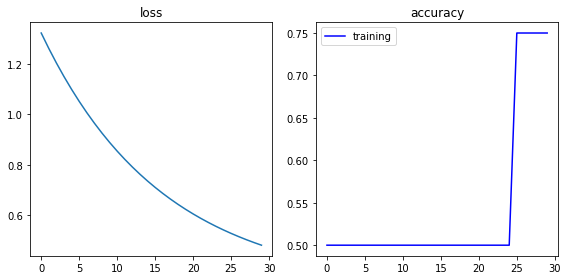

In [56]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['acc'], 'b-', label="training")
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
# 2. xor게이트에서 다양한 학습률 사용해보기
# 다층 퍼셉트론

data = np.array([[0,0],[1,0],[0,1],[1,1]])
label = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(32, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = RMSprop(lr=0.1),
             loss = mse,
             metrics = ['acc'])

model.fit(data, label, epochs=25)

Epoch 1/25
1/1 [==============================] - 0s 0s/step - loss: 0.2549 - acc: 0.5000
Epoch 2/25
1/1 [==============================] - 0s 0s/step - loss: 0.4382 - acc: 0.5000
Epoch 3/25
1/1 [==============================] - 0s 3ms/step - loss: 0.2126 - acc: 0.5000
Epoch 4/25
1/1 [==============================] - 0s 0s/step - loss: 0.1562 - acc: 1.0000
Epoch 5/25
1/1 [==============================] - 0s 7ms/step - loss: 0.1730 - acc: 0.7500
Epoch 6/25
1/1 [==============================] - 0s 2ms/step - loss: 0.1475 - acc: 1.0000
Epoch 7/25
1/1 [==============================] - 0s 997us/step - loss: 0.1017 - acc: 1.0000
Epoch 8/25
1/1 [==============================] - 0s 999us/step - loss: 0.0813 - acc: 1.0000
Epoch 9/25
1/1 [==============================] - 0s 4ms/step - loss: 0.0635 - acc: 1.0000
Epoch 10/25
1/1 [==============================] - 0s 3ms/step - loss: 0.0498 - acc: 1.0000
Epoch 11/25
1/1 [==============================] - 0s 2ms/step - loss: 0.0335 - acc: 1.0

In [46]:
# 단층 퍼셉트론
# lr = 0.1

x = np.array([[0,0], [1,0], [0,1], [1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation = 'linear'))

model.compile(optimizer = SGD(lr = 0.3),
             loss = mse,
             metrics = ['acc'])

model.fit(x,y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 0s/step - loss: 0.6377 - acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 0s/step - loss: 0.5200 - acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 0s/step - loss: 0.4501 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 0s/step - loss: 0.3988 - acc: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 0.3609 - acc: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3330 - acc: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3123 - acc: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2969 - acc: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 997us/step - loss: 0.2854 - acc: 0.5000
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2769 - acc: 0.5000
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2705 - acc: 0.5000

In [43]:
# 단층 퍼셉트론
# lr = 0.0000001

x = np.array([[0,0], [1,0], [0,1], [1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation = 'linear'))

model.compile(optimizer = SGD(lr=0.0000001),
             loss = mse,
             metrics = ['acc'])

model.fit(x,y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 0s/step - loss: 0.4038 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 997us/step - loss: 0.4038 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 997us/step - loss: 0.4038 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 998us/step - loss: 0.4038 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4038 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4038 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 997us/step - loss: 0.4038 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4038 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 1000us/step - loss: 0.4038 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 998us/step - loss: 0.4038 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 0.4038 - acc: 0.5000
Epoch 175/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4038 - acc: 0.5000
Epoch 176/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4038 - acc: 0.5000
Epoch 177/500
1/1 [==============================] - 0s 996us/step - loss: 0.4038 - acc: 0.5000
Epoch 178/500
1/1 [==============================] - 0s 9ms/step - loss: 0.4038 - acc: 0.5000
Epoch 179/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4038 - acc: 0.5000
Epoch 180/500
1/1 [==============================] - 0s 0s/step - loss: 0.4038 - acc: 0.5000
Epoch 181/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4038 - acc: 0.5000
Epoch 182/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4038 - acc: 0.5000
Epoch 183/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4038 - acc: 0.5000
Epoch 184/500
1/1 [==============================] - 0s 5ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.4038 - acc: 0.5000
Epoch 262/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4038 - acc: 0.5000
Epoch 263/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4038 - acc: 0.5000
Epoch 264/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4038 - acc: 0.5000
Epoch 265/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4038 - acc: 0.5000
Epoch 266/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4038 - acc: 0.5000
Epoch 267/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4038 - acc: 0.5000
Epoch 268/500
1/1 [==============================] - 0s 14ms/step - loss: 0.4038 - acc: 0.5000
Epoch 269/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4038 - acc: 0.5000
Epoch 270/500
1/1 [==============================] - 0s 8ms/step - loss: 0.4038 - acc: 0.5000
Epoch 271/500
1/1 [==============================] - 0s 996us/step - los

1/1 [==============================] - 0s 5ms/step - loss: 0.4038 - acc: 0.5000
Epoch 434/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4038 - acc: 0.5000
Epoch 435/500
1/1 [==============================] - 0s 12ms/step - loss: 0.4038 - acc: 0.5000
Epoch 436/500
1/1 [==============================] - 0s 8ms/step - loss: 0.4038 - acc: 0.5000
Epoch 437/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4038 - acc: 0.5000
Epoch 438/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4038 - acc: 0.5000
Epoch 439/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4038 - acc: 0.5000
Epoch 440/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4038 - acc: 0.5000
Epoch 441/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4038 - acc: 0.5000
Epoch 442/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4038 - acc: 0.5000
Epoch 443/500
1/1 [==============================] - 0s 8ms/step - loss: 

# 결론

- 학습률을 매우 작게 했더니 역시나 학습이 전혀 안 된당 (에폭 500으로 줬는데도 안됨)
- 학습률 0.5랑 0.3이 가장 적절했고 0.1로 하니까 정확도가 0.5에서 0.25로 떨어짐 (loss는 감소함 (?))
